In [195]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [196]:
data = pd.read_csv(r"C:\Users\Admin\Untitled Folder 1\Data\survey.csv")

In [197]:
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [198]:
data.tail()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN
1258,2016-02-01 23:04:31,25,Male,United States,IL,No,Yes,Yes,Sometimes,26-100,...,Don't know,Maybe,No,Some of them,No,No,No,Don't know,No,NaN


In [199]:
data.shape

(1259, 27)

In [200]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

<Axes: >

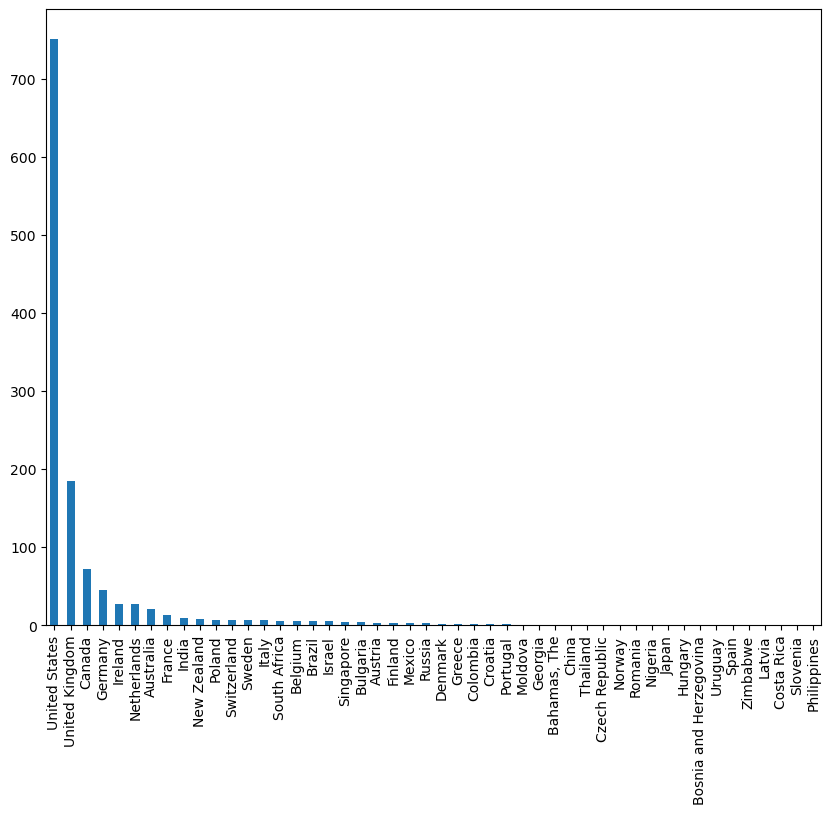

In [201]:
data['Country'].value_counts().plot(kind='bar',figsize=(10,8))

In [202]:
data.drop(['Country','state','Timestamp','comments'], axis = 1, inplace=True)

In [203]:
data.isnull().sum()

Age                            0
Gender                         0
self_employed                 18
family_history                 0
treatment                      0
work_interfere               264
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

In [204]:
data['self_employed'].value_counts()

No     1095
Yes     146
Name: self_employed, dtype: int64

In [205]:
data['self_employed'].fillna('No', inplace=True)

In [206]:
data['work_interfere'].value_counts()

Sometimes    465
Never        213
Rarely       173
Often        144
Name: work_interfere, dtype: int64

In [207]:
data['work_interfere'].fillna('N/A',inplace=True)

<Axes: >

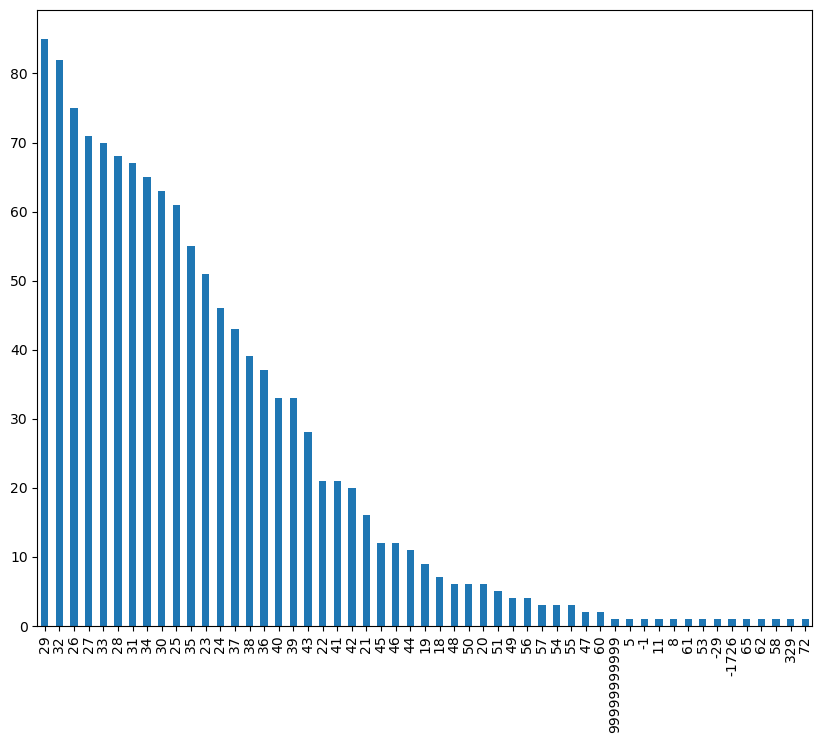

In [208]:
data['Age'].value_counts().plot(kind='bar',figsize=(10,8))

In [209]:
data.drop(data[(data[ 'Age' ]>60) | (data[ 'Age' ]<18)].index, inplace=True)

<Axes: >

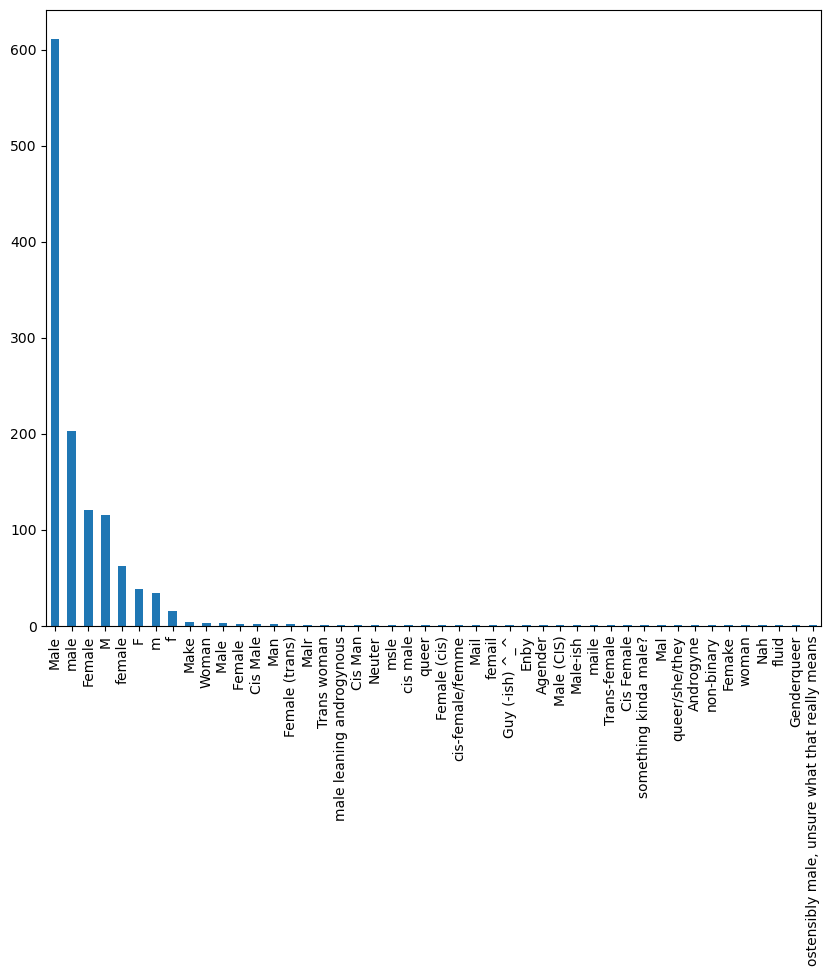

In [210]:
data['Gender'].value_counts().plot(kind='bar',figsize=(10,8))

In [211]:
data['Gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male','Man', 'cis male','Mail','Male-ish', 'Male (CIS)','Cis Man', 'msle','Malr','Mal','maile', 'Make',], 'Male', inplace = True)
data[ 'Gender']. replace([ 'Female ','female','F','femail','Woman', 'Female','Cis Female','cis-female/femme','Femake', 'Female (cis)','woman', ], 'Female', inplace=True)

In [212]:
data['Gender'].replace(['Female (trans)', 'queer/she/they', 'non-binary', 'fluid', 'queer', 'Agender', 'Androgyne', 'Trans-female', 'male learning androgynous', 'A little about you', 'Nah', 'All', 'ostensibly male', 'unsure what that really means', 'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?', 'Guyish', 'Trans woman'], 'Non-Binary', inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_28448\1483789242.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data["Age"])


Text(0.5, 0, 'Age')

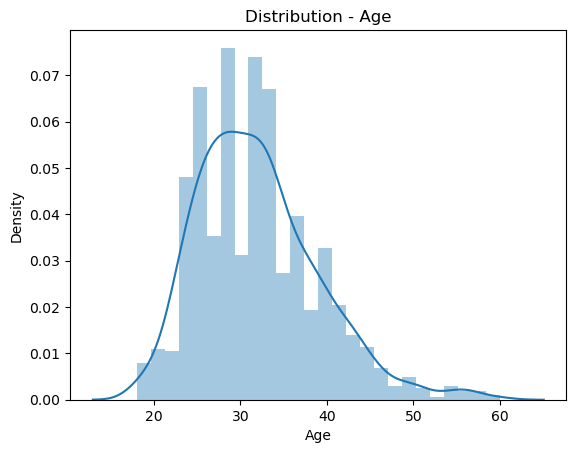

In [213]:
sb.distplot(data["Age"])
plt.title("Distribution - Age")
plt.xlabel("Age")

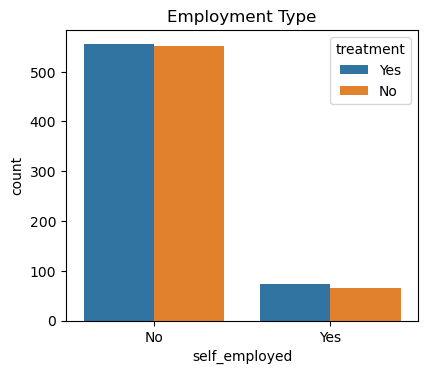

In [214]:
plt.figure(figsize=(10, 40))
plt.subplot(9, 2, 1)
sb.countplot(x='self_employed', hue='treatment', data=data)
plt.title('Employment Type')

plt.show()

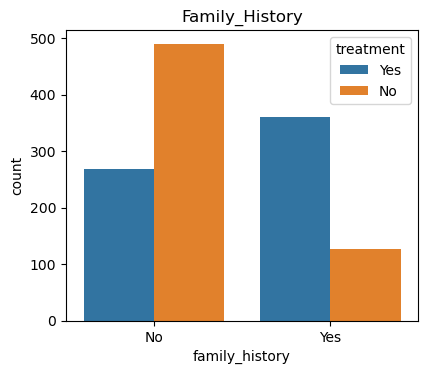

In [215]:
plt.figure(figsize=(10, 40))
plt.subplot(9, 2, 2)
sb.countplot(x='family_history', hue='treatment', data=data)
plt.title('Family_History')

plt.show()

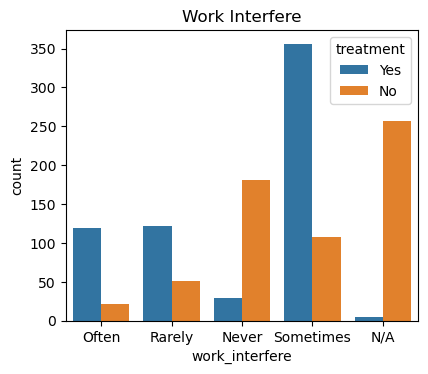

In [216]:
plt.figure(figsize=(10, 40))
plt.subplot(9, 2, 3)
sb.countplot(x='work_interfere', hue='treatment', data=data)
plt.title('Work Interfere')

plt.show()

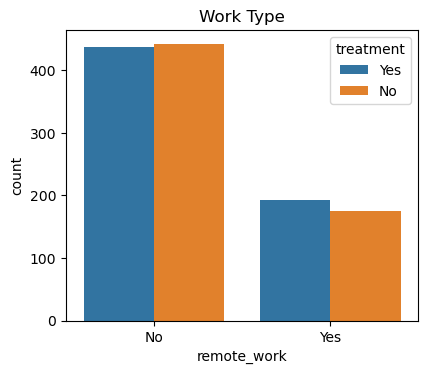

In [217]:
plt.figure(figsize=(10, 40))
plt.subplot(9, 2, 4)
sb.countplot(x='remote_work', hue='treatment', data=data)
plt.title('Work Type')

plt.show()

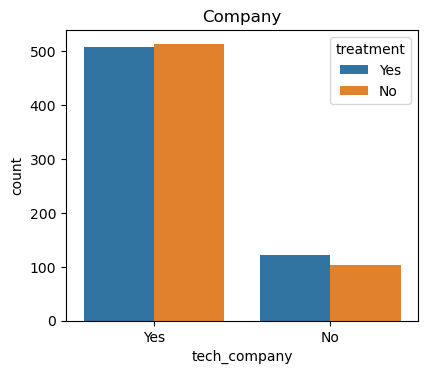

In [218]:
plt.figure(figsize=(10, 40))
plt.subplot(9, 2, 5)
sb.countplot(x='tech_company', hue='treatment', data=data)
plt.title('Company')

plt.show()

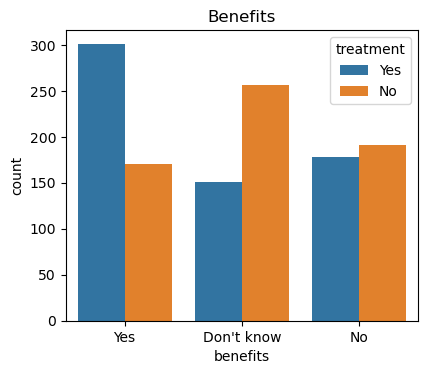

In [219]:
plt.figure(figsize=(10, 40))
plt.subplot(9, 2, 6)
sb.countplot(x='benefits', hue='treatment', data=data)
plt.title('Benefits')

plt.show()

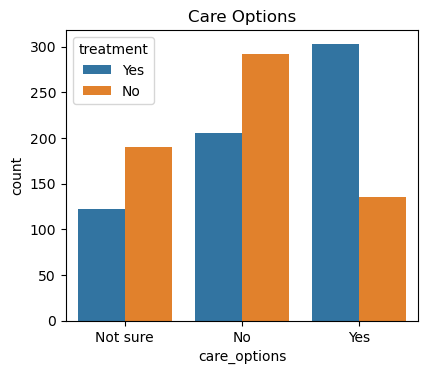

In [220]:
plt.figure(figsize=(10, 40))
plt.subplot(9, 2, 7)
sb.countplot(x='care_options', hue='treatment', data=data)
plt.title('Care Options')

plt.show()

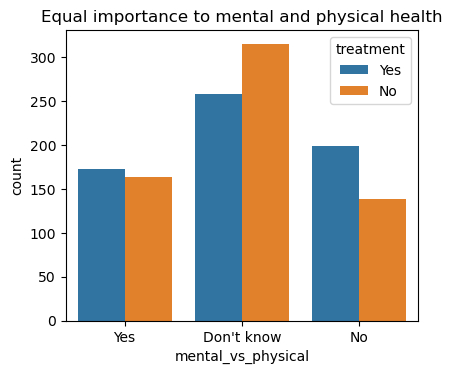

In [221]:
plt.figure(figsize=(10, 40))
plt.subplot(9, 2, 8)
sb.countplot(x='mental_vs_physical', hue='treatment', data=data)
plt.title('Equal importance to mental and physical health')

plt.show()

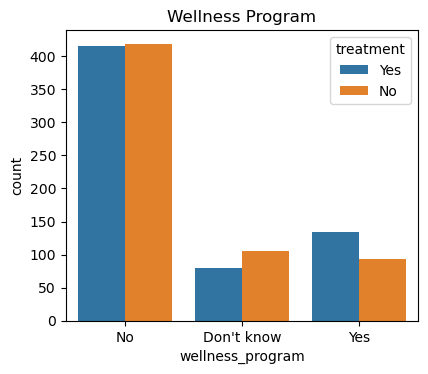

In [222]:
plt.figure(figsize=(10, 40))
plt.subplot(9, 2, 9)
sb.countplot(x='wellness_program', hue='treatment', data=data)
plt.title('Wellness Program')

plt.show()

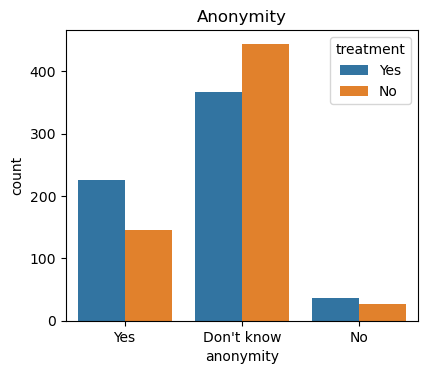

In [223]:
plt.figure(figsize=(10, 40))
plt.subplot(9, 2, 10)
sb.countplot(x='anonymity', hue='treatment', data=data)
plt.title('Anonymity')

plt.show()

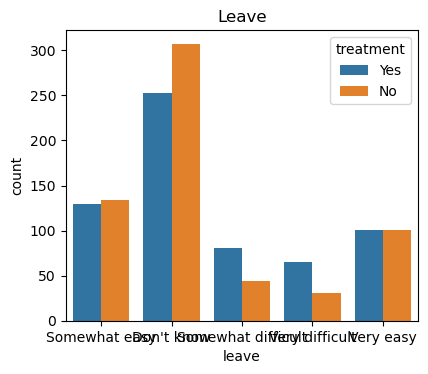

In [224]:
plt.figure(figsize=(10, 40))
plt.subplot(9, 2, 11)
sb.countplot(x='leave', hue='treatment', data=data)
plt.title('Leave')

plt.show()

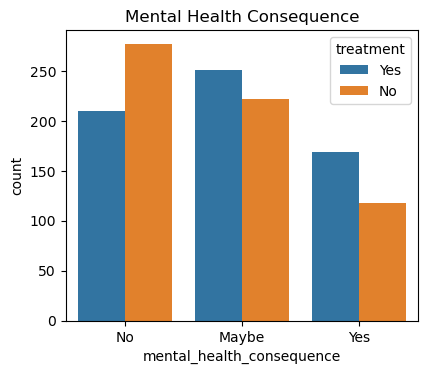

In [225]:
plt.figure(figsize=(10, 40))
plt.subplot(9, 2, 12)
sb.countplot(x='mental_health_consequence', hue='treatment', data=data)
plt.title('Mental Health Consequence')

plt.show()

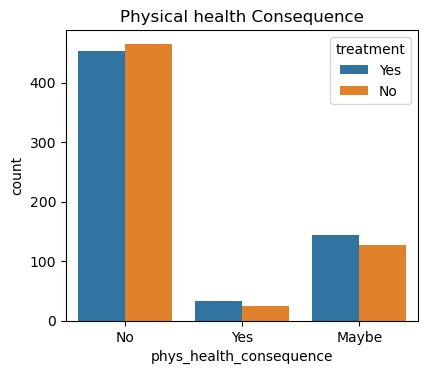

In [226]:
plt.figure(figsize=(10, 40))
plt.subplot(9, 2, 13)
sb.countplot(x='phys_health_consequence', hue='treatment', data=data)
plt.title('Physical health Consequence')

plt.show()

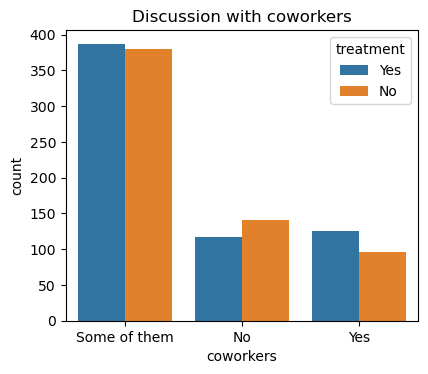

In [227]:
plt.figure(figsize=(10, 40))
plt.subplot(9, 2, 14)
sb.countplot(x='coworkers', hue='treatment', data=data)
plt.title('Discussion with coworkers')

plt.show()

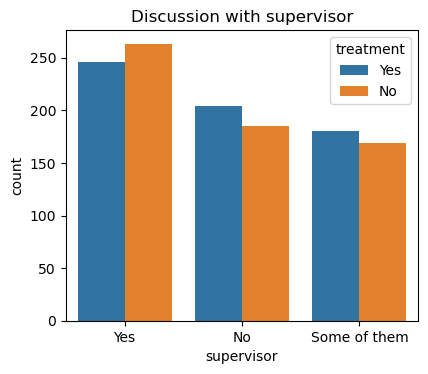

In [228]:
plt.figure(figsize=(10, 40))
plt.subplot(9, 2, 15)
sb.countplot(x='supervisor', hue='treatment', data=data)
plt.title('Discussion with supervisor')

plt.show()

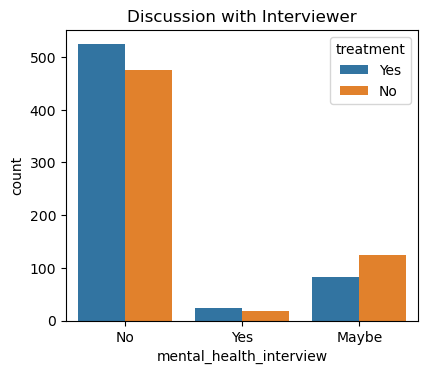

In [229]:
plt.figure(figsize=(10, 40))
plt.subplot(9, 2, 16)
sb.countplot(x='mental_health_interview', hue='treatment', data=data)
plt.title('Discussion with Interviewer')

plt.show()

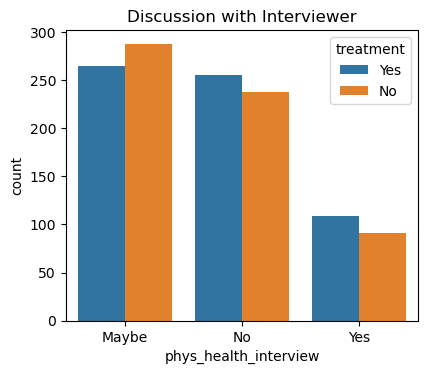

In [230]:
plt.figure(figsize=(10, 40))
plt.subplot(9, 2, 17)
sb.countplot(x='phys_health_interview', hue='treatment', data=data)
plt.title('Discussion with Interviewer')

plt.show()

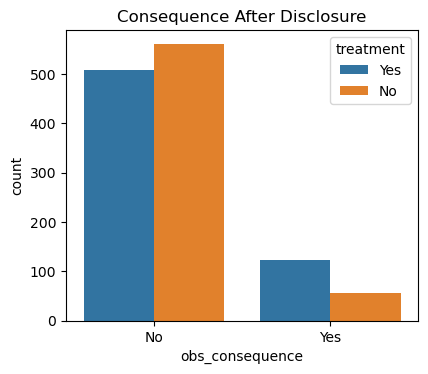

In [231]:
plt.figure(figsize=(10, 40))
plt.subplot(9, 2, 18)
sb.countplot(x='obs_consequence', hue='treatment', data=data)
plt.title('Consequence After Disclosure')

plt.show()

In [232]:
data.describe(include='all')

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
count,1247.000000,1247,1247,1247,1247,1247,1247,1247,1247,1247,...,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247
unique,NaN,7,2,2,2,5,6,2,2,3,...,3,5,3,3,3,3,3,3,3,2
top,NaN,Male,No,No,Yes,Sometimes,6-25,No,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No
freq,NaN,983,1107,759,630,463,288,879,1023,471,...,811,560,487,918,767,509,1000,553,573,1068
mean,31.971131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,7.052598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,27.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,36.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [233]:
X = data.drop('treatment', axis = 1)
y = data['treatment']

In [234]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

In [235]:
X = data. drop ('treatment', axis = 1)
y = data ['treatment']

In [236]:
ct = ColumnTransformer ([('oe',OrdinalEncoder(),['Gender', 'self_employed', 'family_history', 'work_interfere', 'no_employees', 'remote_work', 'tech_company',
                                                 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
                                                 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview',
                                                 'mental_vs_physical', 'obs_consequence' ])], remainder='passthrough')

In [237]:
X = ct.fit_transform(X)

In [238]:
le = LabelEncoder ()
y = le.fit_transform(y)

In [239]:
import joblib
joblib.dump(ct,'feature_values')

['feature_values']

In [240]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=49)

In [241]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((872, 22), (375, 22), (872,), (375,))

In [242]:
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier 
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, classification_report,auc

In [243]:
model_dict = {}

model_dict['Logistic regression']= LogisticRegression (solver='liblinear', random_state=49)
model_dict['KNN Classifier' ] = KNeighborsClassifier ()
model_dict[ 'Decision Tree Classifier' ] = DecisionTreeClassifier (random_state=49)
model_dict ['Random Forest Classifier'] = RandomForestClassifier (random_state=49)
model_dict ['AdaBoost Classifier' ] = AdaBoostClassifier (random_state=49)
model_dict ['Gradient Boosting Classifier' ] = GradientBoostingClassifier (random_state=49)
model_dict ['XGB Classifier'] = XGBClassifier (random_state=49)

In [244]:
def model_test (X_train, X_test, y_train, y_test, model, model_name):
    model.fit(X_train,y_train)
    y_pred = model.predict (X_test)
    accuracy = accuracy_score (y_test,y_pred)
    print('====================================={}======================================='.format(model_name))
    print('Score is : {}'.format (accuracy))
    print()

In [245]:
for model_name, model in model_dict.items ():
    model_test(X_train, X_test, y_train, y_test, model,model_name)

=====================================Logistic regression=======================================
Score is : 0.8506666666666667

=====================================KNN Classifier=======================================
Score is : 0.7973333333333333

=====================================Decision Tree Classifier=======================================
Score is : 0.776

=====================================Random Forest Classifier=======================================
Score is : 0.848

=====================================AdaBoost Classifier=======================================
Score is : 0.848

=====================================Gradient Boosting Classifier=======================================
Score is : 0.8373333333333334

=====================================XGB Classifier=======================================
Score is : 0.8026666666666666



In [246]:
abc = AdaBoostClassifier (random_state=99)
abc.fit (X_train,y_train)
pred_abc = abc.predict (X_test)
print ('Accuracy of AdaBoost=', accuracy_score (y_test,pred_abc))

Accuracy of AdaBoost= 0.848


In [247]:
from sklearn.model_selection import RandomizedSearchCV
params_abc = {'n_estimators': [int(x) for x in np.linspace(start = 1, stop = 50, num = 15)],
              'learning_rate': [(0.97 + x / 100) for x in range(0, 8)],
             }
abc_random = RandomizedSearchCV (random_state=49, estimator=abc, param_distributions = params_abc,n_iter =50,cv=5,n_jobs=-1)

In [248]:
params_abc

{'n_estimators': [1, 4, 8, 11, 15, 18, 22, 25, 29, 32, 36, 39, 43, 46, 50],
 'learning_rate': [0.97, 0.98, 0.99, 1.0, 1.01, 1.02, 1.03, 1.04]}

In [249]:
abc_random.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=99),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'learning_rate': [0.97, 0.98, 0.99, 1.0,
                                                          1.01, 1.02, 1.03,
                                                          1.04],
                                        'n_estimators': [1, 4, 8, 11, 15, 18,
                                                         22, 25, 29, 32, 36, 39,
                                                         43, 46, 50]},
                   random_state=49)

In [250]:
abc_random.best_params_

{'n_estimators': 11, 'learning_rate': 1.04}

In [251]:
abc_tuned = AdaBoostClassifier (random_state=49, n_estimators=11, learning_rate=1.02)
abc_tuned.fit (X_train,y_train)
pred_abc_tuned = abc_tuned.predict (X_test)
print ('Accuracy of Adaboost (tuned)=' , accuracy_score (y_test,pred_abc_tuned))

Accuracy of Adaboost (tuned)= 0.872


Text(50.722222222222214, 0.5, 'Actual')

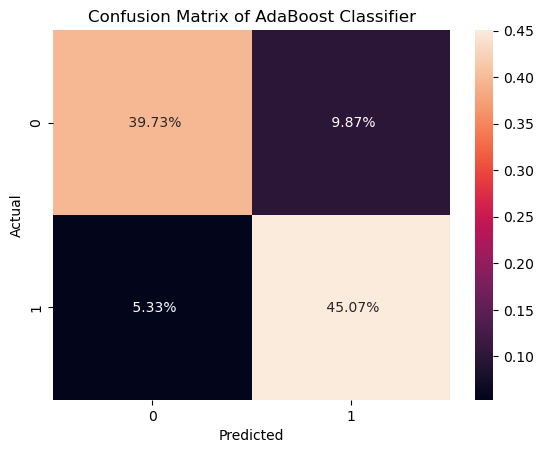

In [252]:
cf_matrix = confusion_matrix(y_test, pred_abc)
sb.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt=' .2%') 
plt.title( 'Confusion Matrix of AdaBoost Classifier') 
plt.xlabel('Predicted') 
plt.ylabel('Actual')

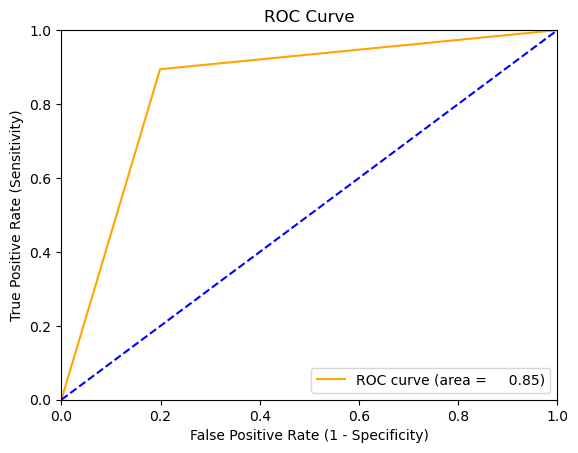

(array([0.        , 0.19892473, 1.        ]),
 array([0.        , 0.89417989, 1.        ]),
 array([2, 1, 0]))

In [253]:
from sklearn import metrics
fpr_abc, tpr_abc, thresholds_abc = roc_curve (y_test, pred_abc)
roc_auc_abc = metrics.auc(fpr_abc, tpr_abc)
plt.plot (fpr_abc, tpr_abc, color='orange', label= 'ROC curve (area = %8.2f)' % roc_auc_abc)
plt.plot ([0, 1], [0, 1], color='blue', linestyle='--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.0]) 
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel ('True Positive Rate (Sensitivity)' )
plt.legend(loc="lower right")
plt.show()
roc_curve(y_test,pred_abc)

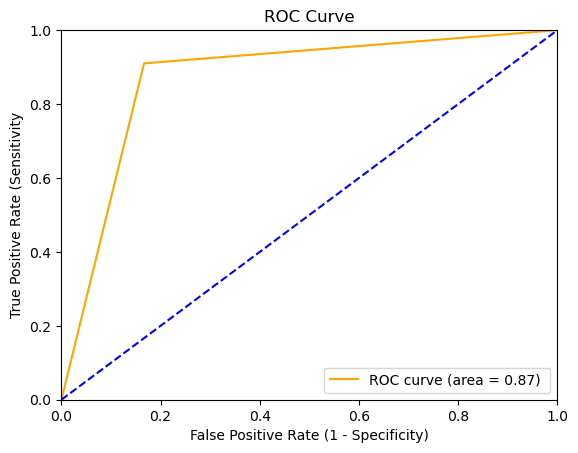

(array([0.        , 0.16666667, 1.        ]),
 array([0.        , 0.91005291, 1.        ]),
 array([2, 1, 0]))

In [254]:
fpr_abc_tuned, tpr_abc_tuned, thresholds_abc_tuned = roc_curve (y_test, pred_abc_tuned)
roc_auc_abc_tuned = metrics.auc (fpr_abc_tuned, tpr_abc_tuned)
plt.plot (fpr_abc_tuned, tpr_abc_tuned, color='orange',label= 'ROC curve (area = %0.2f) ' % roc_auc_abc_tuned)
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.0]) 
plt.title('ROC Curve' )
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity' )
plt.legend(loc="lower right")
plt.show()
roc_curve(y_test,pred_abc_tuned)

In [255]:
print(classification_report(y_test,pred_abc))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84       186
           1       0.82      0.89      0.86       189

    accuracy                           0.85       375
   macro avg       0.85      0.85      0.85       375
weighted avg       0.85      0.85      0.85       375



In [256]:
print(classification_report(y_test,pred_abc_tuned))

              precision    recall  f1-score   support

           0       0.90      0.83      0.87       186
           1       0.85      0.91      0.88       189

    accuracy                           0.87       375
   macro avg       0.87      0.87      0.87       375
weighted avg       0.87      0.87      0.87       375



In [257]:
import pickle
filename = 'model.pkl'
pickle.dump('abc_tuned',open('model.pkl','wb'))